# Imports

In [22]:
import os
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tabularnn import dataprep
from tabularnn import train

import importlib

importlib.reload(dataprep)
importlib.reload(train)

<module 'tabularnn.train' from 'c:\\Users\\Joel Nic\\Documents\\college\\courses\\fall 2024\\ICS-661\\nn_for_tablular_data\\tabularnn\\train.py'>

# Load Train/Test Data

In [23]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
X_train = train_df.iloc[:, 1:].values  # features 
y_train = train_df.iloc[:, 0].values   # first column is labels

# input/output dim
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = 10

In [24]:
dataset = dataprep.TabularDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
test_df = pd.read_csv(os.path.join('data', 'test.csv'))
X_test = test_df.iloc[:, 1:].values  # features
y_test = test_df.iloc[:, 0].values   # first column is labels
test_dataset = dataprep.TabularDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Model Initialization

In [40]:
from tabularnn import models
importlib.reload(models)

model = models.high_dim_model

# model = models.one_hidden_lay_nn_dropout

# Train/Evaluate

Epoch [1/10], Loss: 0.2593, F1 Score: 0.924, Accuracy: 0.924, Precision: 0.924, AUROC: 0.995
Epoch [2/10], Loss: 0.0921, F1 Score: 0.973, Accuracy: 0.973, Precision: 0.973, AUROC: 0.999
Epoch [3/10], Loss: 0.0718, F1 Score: 0.978, Accuracy: 0.978, Precision: 0.978, AUROC: 1.000
Epoch [4/10], Loss: 0.0551, F1 Score: 0.984, Accuracy: 0.984, Precision: 0.984, AUROC: 1.000
Epoch [5/10], Loss: 0.0452, F1 Score: 0.986, Accuracy: 0.986, Precision: 0.986, AUROC: 1.000
Epoch [6/10], Loss: 0.0405, F1 Score: 0.988, Accuracy: 0.988, Precision: 0.988, AUROC: 1.000
Epoch [7/10], Loss: 0.0349, F1 Score: 0.990, Accuracy: 0.990, Precision: 0.990, AUROC: 1.000
Epoch [8/10], Loss: 0.0287, F1 Score: 0.991, Accuracy: 0.991, Precision: 0.991, AUROC: 1.000
Epoch [9/10], Loss: 0.0297, F1 Score: 0.991, Accuracy: 0.991, Precision: 0.991, AUROC: 1.000
Epoch [10/10], Loss: 0.0246, F1 Score: 0.993, Accuracy: 0.993, Precision: 0.993, AUROC: 1.000


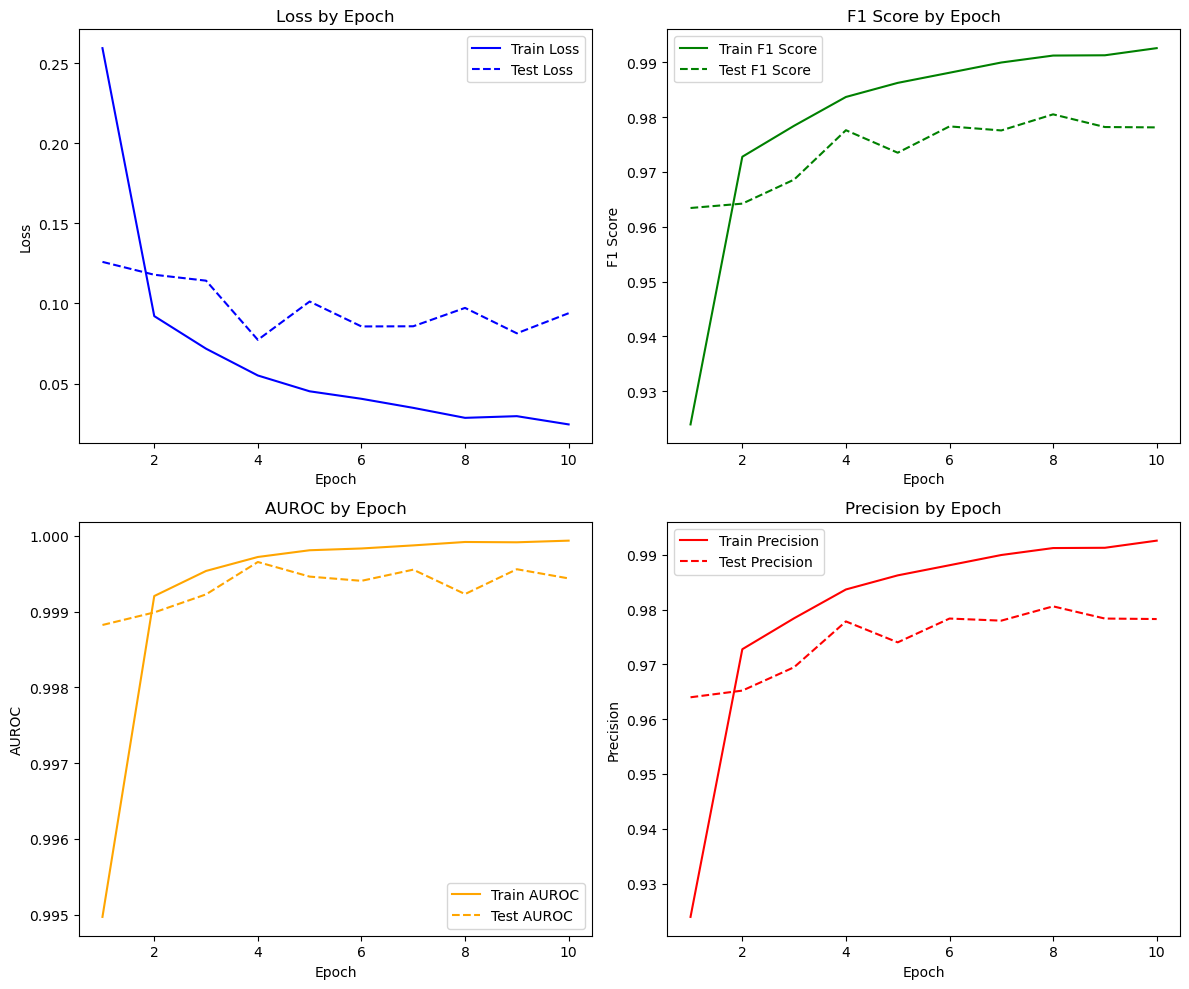

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
model, loss, f1, acc, precision, auc = train.train_model(model, dataloader, test_dataloader=test_dataloader, criterion=criterion, optimizer = optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.0115, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000
Epoch [2/10], Loss: 0.0085, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000
Epoch [3/10], Loss: 0.0089, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000
Epoch [4/10], Loss: 0.0074, F1 Score: 0.998, Accuracy: 0.998, Precision: 0.998, AUROC: 1.000
Epoch [5/10], Loss: 0.0066, F1 Score: 0.998, Accuracy: 0.998, Precision: 0.998, AUROC: 1.000
Epoch [6/10], Loss: 0.0090, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000
Epoch [7/10], Loss: 0.0064, F1 Score: 0.998, Accuracy: 0.998, Precision: 0.998, AUROC: 1.000
Epoch [8/10], Loss: 0.0097, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000
Epoch [9/10], Loss: 0.0049, F1 Score: 0.998, Accuracy: 0.998, Precision: 0.998, AUROC: 1.000
Epoch [10/10], Loss: 0.0098, F1 Score: 0.997, Accuracy: 0.997, Precision: 0.997, AUROC: 1.000


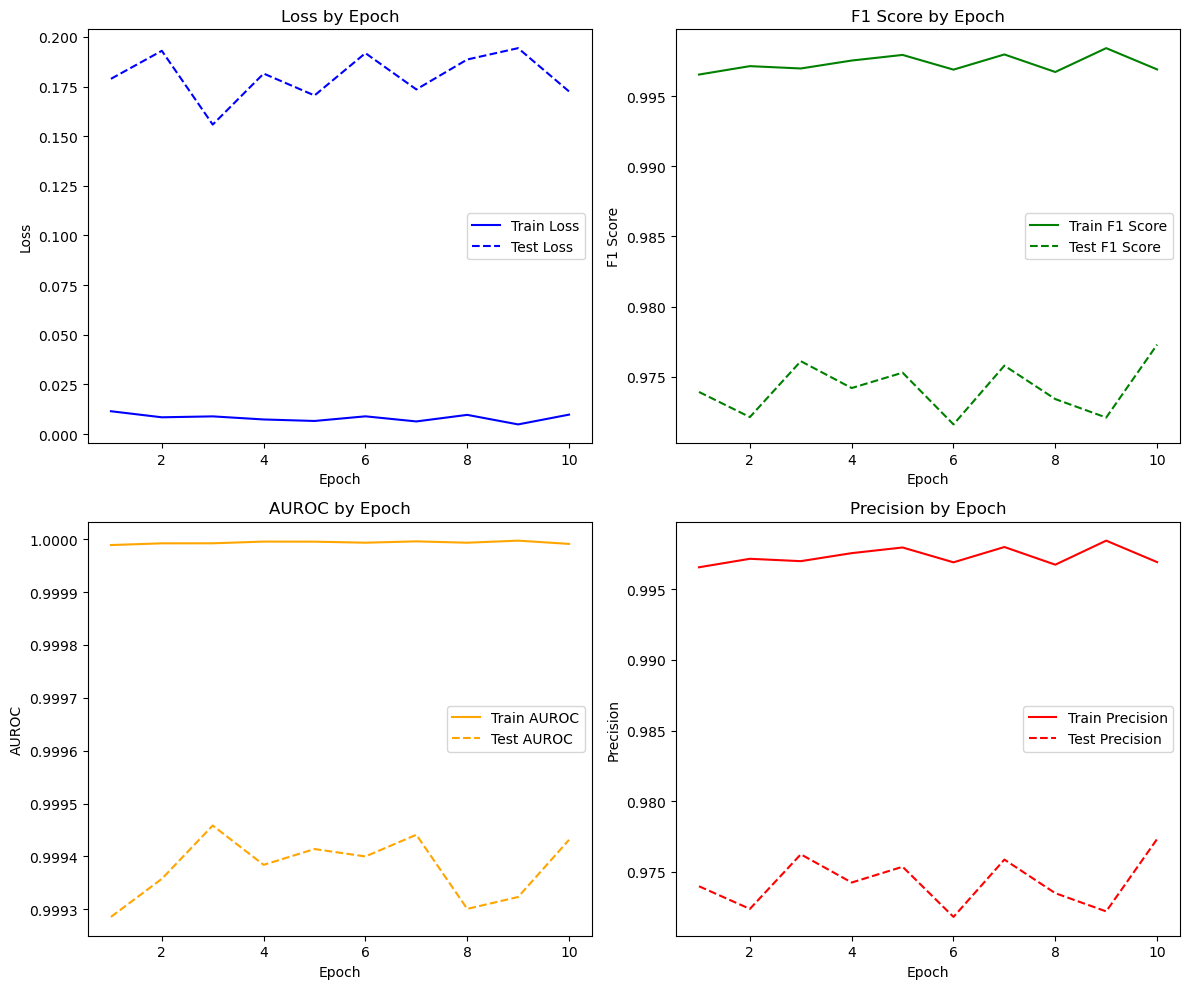

In [34]:
importlib.reload(train)

